In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## understanding the data

In [198]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

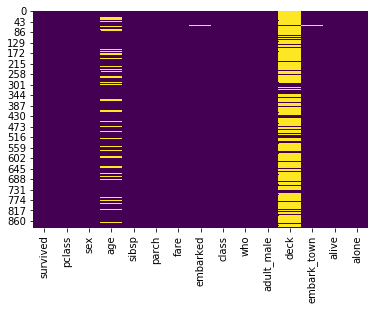

In [199]:
sns.heatmap(titanic.isnull(),cbar=False, cmap='viridis')

In [200]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

Text(0.5, 0, 'Age')

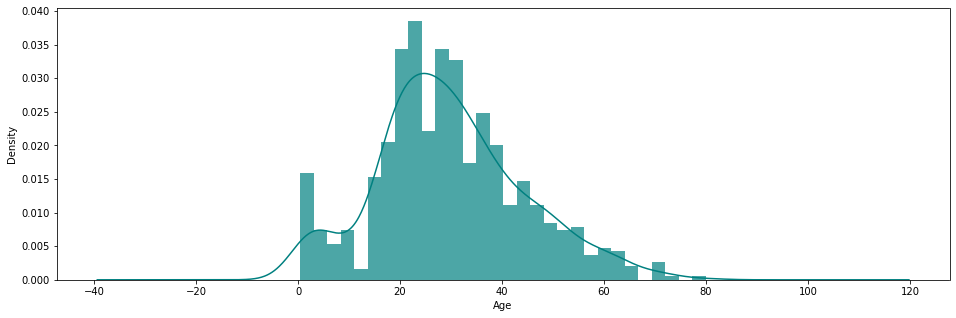

In [201]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('Age')

Text(0.5, 1.0, 'male')

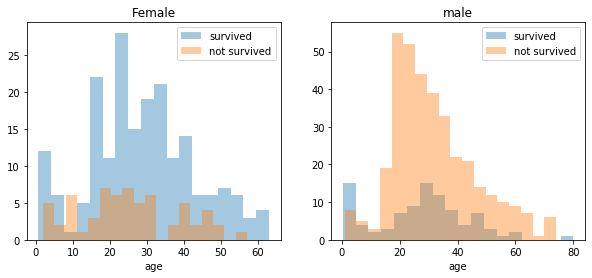

In [202]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(1,2,figsize=(10,4))

women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),bins=18,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(),bins=18,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')

In [203]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

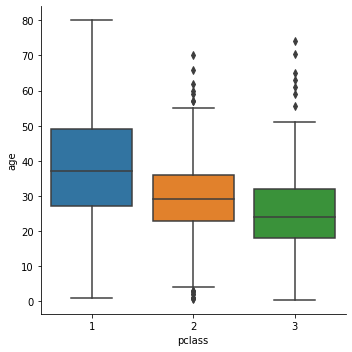

In [204]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

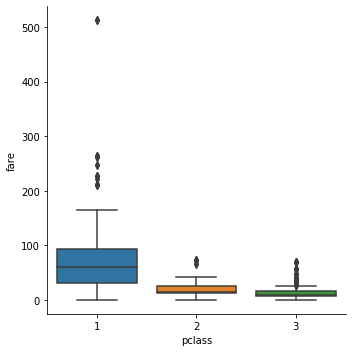

In [205]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [206]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [207]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [208]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [209]:
def impute_ages(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age

In [210]:
titanic['age']=titanic[['age','pclass']].apply(impute_ages,axis=1)

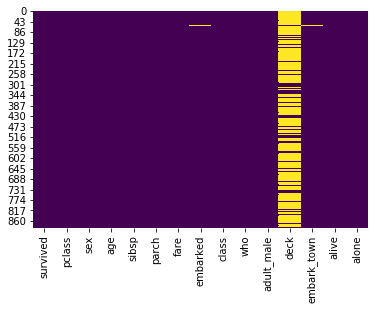

In [211]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

## Analysing Embarked

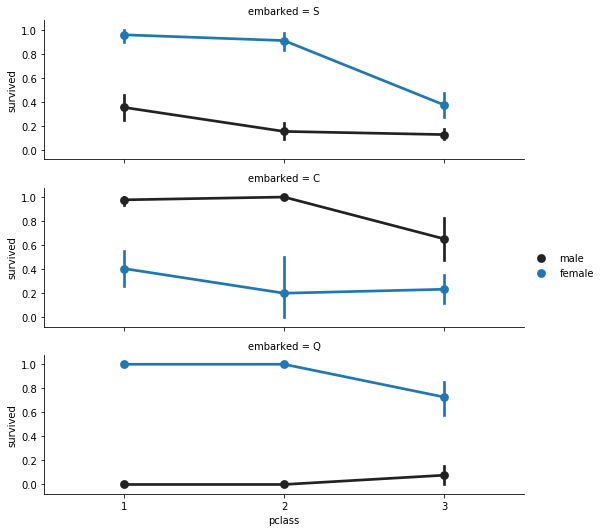

In [212]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect = 3)

f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [213]:
titanic['embarked'].isnull().sum()

2

In [214]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [215]:
titanic['embarked'].fillna('S',inplace=True)

In [216]:
titanic['embarked'].isnull().sum()

0

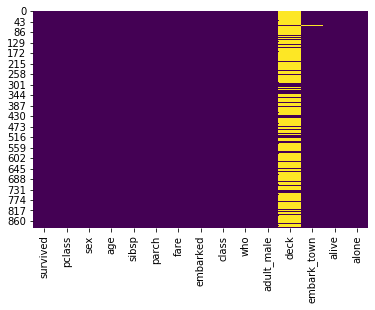

In [217]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [218]:
titanic.drop(labels = ['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

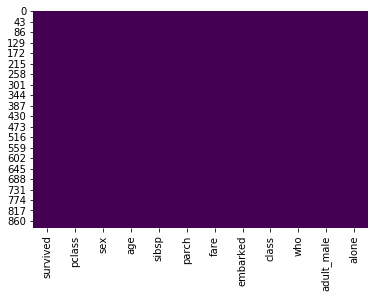

In [219]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [220]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [221]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


## Categorical data to Numerical

In [222]:
genders={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(genders)

In [223]:
who={'man':0,'woman':1,'child':2}
titanic['who']=titanic['who'].map(who)

In [224]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [225]:
alone={False:0,True:1}
titanic['alone']=titanic['alone'].map(alone)

In [226]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [227]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.00000,1,0,7.2500,0,Third,0,1,0
1,1,1,1,38.00000,1,0,71.2833,1,First,1,0,0
2,1,3,1,26.00000,0,0,7.9250,0,Third,1,0,1
3,1,1,1,35.00000,1,0,53.1000,0,First,1,0,0
4,0,3,0,35.00000,0,0,8.0500,0,Third,0,1,1
5,0,3,0,25.14062,0,0,8.4583,2,Third,0,1,1
6,0,1,0,54.00000,0,0,51.8625,0,First,0,1,1
7,0,3,0,2.00000,3,1,21.0750,0,Third,2,0,0
8,1,3,1,27.00000,0,2,11.1333,0,Third,1,0,0
9,1,2,1,14.00000,1,0,30.0708,1,Second,2,0,0


In [228]:
titanic.drop(labels=['class'],axis=1,inplace=True)

In [229]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,1


## Build Logistic Regression

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [231]:
X=titanic.drop(['survived'],axis=1)
y=titanic['survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape

(596, 10)

In [232]:
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [234]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
290,0,0
291,0,0
292,1,1
293,1,0


In [235]:
model.score(X_test,y_test)

0.8305084745762712

In [236]:
from sklearn.feature_selection import RFE


In [237]:
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(X,y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [238]:
X.shape

(891, 10)

In [239]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
       False])

In [240]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,3,0,35.0,0,0,8.0500,0,0,1,1


In [241]:
XX=X[X.columns[rfe.support_]]
XX.head()

,pclass,sex,sibsp,who,adult_male
0,3,0,1,0,1
1,1,1,1,1,0
2,3,1,0,1,0
3,1,1,1,1,0
4,3,0,0,0,1


In [242]:
X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.2,random_state=8,stratify=y)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
y_predict=model.predict(X_test)
model.score(X_test,y_test)

0.8491620111731844

# Accuracy, F1_score, P, R, AUR_ROC Curve

In [244]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [246]:
X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.2,random_state=8,stratify=y)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train,y_train)

y_predict_prob = model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)

In [248]:
print('Accuracy: ',accuracy_score(y_test, y_predict))
print('Log loss: ',log_loss(y_test,y_predict))
print('auc: ',auc(fpr,tpr))

Accuracy:  0.8491620111731844
Log loss:  5.209813172244417
auc:  0.901844532279315


### ROC-AUC curve

In [249]:
idx = np.min(np.where(tpr>0.95))
idx

20

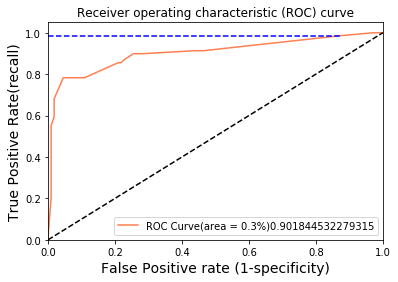

Using a threshold of 0.095 guarantees a sensitivity of 0.986 and a specificity of 0.127, i.e. a false positive rate of 87.27%.


In [250]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC Curve(area = 0.3%)' +str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate (1-specificity)', fontsize = 14)
plt.ylabel('True Positive Rate(recall)',fontsize = 14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

print('Using a threshold of %.3f ' % thr[idx] + 'guarantees a sensitivity of %.3f '%tpr[idx] + 'and a specificity of %.3f' %(1-fpr[idx]) + 
      ', i.e. a false positive rate of %.2f%%.' %(np.array(fpr[idx])*100))